In [1]:
import os
import time
import math

import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Import
DATA_PATH = 'dataset/'
df_train = pd.read_json(f'{DATA_PATH}train.json',lines=True)
df_test = pd.read_json(f'{DATA_PATH}test.json', lines=True)

print('Train set sequences: ', df_train.shape)
print('Test set sequences: ', df_test.shape)

Train set sequences:  (2400, 19)
Test set sequences:  (3634, 7)


## Loading a structure and the associated bpp

In [3]:
idx = 1

In [4]:
bpp = np.load(DATA_PATH + f"bpps/{df_train['id'][idx]}.npy")

In [5]:
structure = df_train['structure'][idx]
structure

'.....(((((((((((((((((((((((....)))))))))).)))))))))))))..(((...))).(((((((....))))))).....................'

## Converting structures to matrices

In [6]:
def get_couples(structure):
    """
    For each closing parenthesis, I find the matching opening one and store their index in the couples list.
    The assigned list is used to keep track of the assigned opening parenthesis
    """
    opened = [idx for idx, i in enumerate(structure) if i == '(']
    closed = [idx for idx, i in enumerate(structure) if i == ')']

    assert len(opened) == len(closed)


    assigned = []
    couples = []

    for close_idx in closed:
        for open_idx in opened:
            if open_idx < close_idx:
                if open_idx not in assigned:
                    candidate = open_idx
            else:
                break
        assigned.append(candidate)
        couples.append([candidate, close_idx])
        
    assert len(couples) == len(opened)
    
    return couples

In [7]:
def build_matrix(couples, size):
    mat = np.zeros((size, size))
    
    for i in range(size):  # neigbouring bases are linked as well
        if i < size - 1:
            mat[i, i + 1] = 1
        if i > 0:
            mat[i, i - 1] = 1
    
    for i, j in couples:
        mat[i, j] = 1
        mat[j, i] = 1
        
    return mat

In [8]:
couples = get_couples(structure)
mat = build_matrix(couples, len(structure))

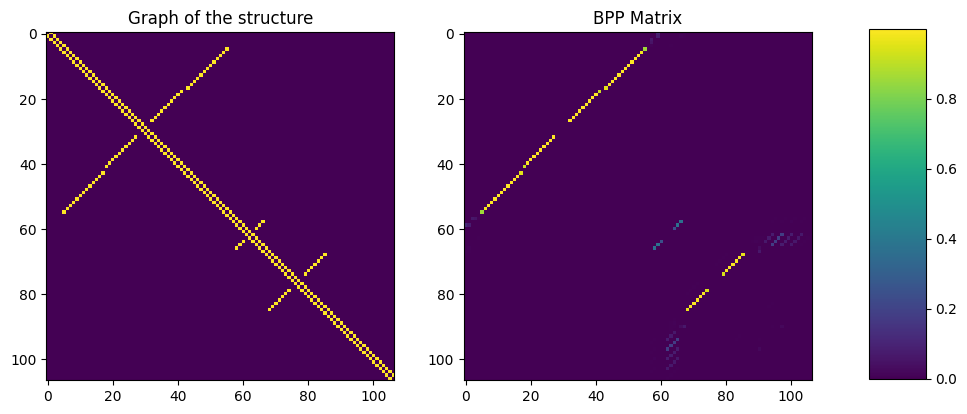

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.35, 5))


im = axes[0].imshow(mat, interpolation='none')
axes[0].set_title('Graph of the structure')

im = axes[1].imshow(bpp, interpolation='none')
axes[1].set_title('BPP Matrix')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()